# Multiple Linear Regression in Statsmodels - Lab

## Introduction
In this lab, you'll practice fitting a multiple linear regression model on the Ames Housing dataset!

## Objectives
You will be able to:
* Determine if it is necessary to perform normalization/standardization for a specific model or set of data
* Use standardization/normalization on features of a dataset
* Identify if it is necessary to perform log transformations on a set of features
* Perform log transformations on different features of a dataset
* Use statsmodels to fit a multiple linear regression model
* Evaluate a linear regression model by using statistical performance metrics pertaining to overall model and specific parameters


## The Ames Housing Data

Using the specified continuous and categorical features, preprocess your data to prepare for modeling:
* Split off and one hot encode the categorical features of interest
* Log and scale the selected continuous features

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ames = pd.read_csv('ames.csv')

continuous = ['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']
categoricals = ['BldgType', 'KitchenQual', 'SaleType', 'MSZoning', 'Street', 'Neighborhood']


## Continuous Features

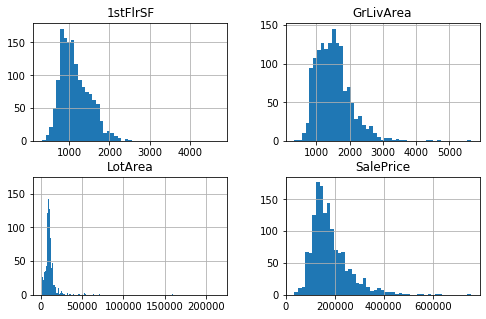

In [7]:
ames[continuous].hist(figsize=(8, 5), bins='auto')
plt.show()

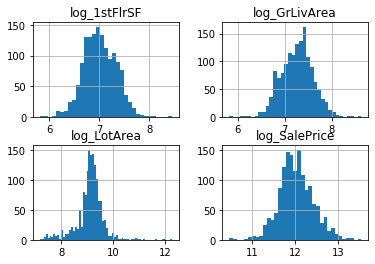

In [11]:
# Log transform
log_ames = ames[continuous]
log_ames = np.log(log_ames)
log_ames.columns = [f'log_{feat}' for feat in continuous]
log_ames.hist(bins='auto')
plt.show()

In [13]:
# Normalize
# helper function to help normalize
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

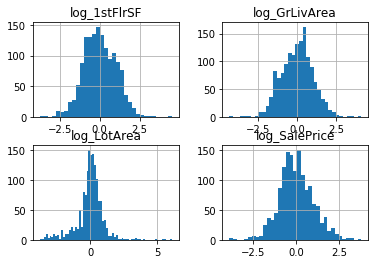

In [14]:
# create normalized, log-transformed continuous variables
final_continuous = log_ames.apply(normalize)
final_continuous.hist(bins='auto')
plt.show()

## Categorical Features

In [15]:
# One hot encode categoricals
cat_ames = ames[categoricals]
cat_ames

,BldgType,KitchenQual,SaleType,MSZoning,Street,Neighborhood
0,1Fam,Gd,WD,RL,Pave,CollgCr
1,1Fam,TA,WD,RL,Pave,Veenker
2,1Fam,Gd,WD,RL,Pave,CollgCr
3,1Fam,Gd,WD,RL,Pave,Crawfor
4,1Fam,Gd,WD,RL,Pave,NoRidge
...,...,...,...,...,...,...
1455,1Fam,TA,WD,RL,Pave,Gilbert
1456,1Fam,TA,WD,RL,Pave,NWAmes
1457,1Fam,Gd,WD,RL,Pave,Crawfor
1458,1Fam,Gd,WD,RL,Pave,NAmes


In [19]:
dummies = pd.get_dummies(cat_ames, drop_first=True, prefix=categoricals)
dummies

,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,SaleType_CWD,SaleType_Con,SaleType_ConLD,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1456,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1457,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1458,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Combine Categorical and Continuous Features

In [21]:
# combine features into a single dataframe called preprocessed
preprocessed = pd.concat([final_continuous, dummies], axis=1)
preprocessed

,log_LotArea,log_1stFlrSF,log_GrLivArea,log_SalePrice,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,KitchenQual_Fa,KitchenQual_Gd,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,-0.133185,-0.803295,0.529078,0.559876,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0.113403,0.418442,-0.381715,0.212692,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.419917,-0.576363,0.659449,0.733795,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0.103311,-0.439137,0.541326,-0.437232,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0.878108,0.112229,1.281751,1.014303,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.259100,-0.465447,0.416538,0.121392,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1456,0.725171,1.980456,1.106213,0.577822,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1457,-0.002324,0.228260,1.469438,1.174306,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1458,0.136814,-0.077546,-0.854179,-0.399519,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## Run a linear model with SalePrice as the target variable in statsmodels

In [22]:
# Your code here
import statsmodels.api as sm
from statsmodels.formula.api import ols

preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 48 columns):
log_LotArea             1460 non-null float64
log_1stFlrSF            1460 non-null float64
log_GrLivArea           1460 non-null float64
log_SalePrice           1460 non-null float64
BldgType_2fmCon         1460 non-null uint8
BldgType_Duplex         1460 non-null uint8
BldgType_Twnhs          1460 non-null uint8
BldgType_TwnhsE         1460 non-null uint8
KitchenQual_Fa          1460 non-null uint8
KitchenQual_Gd          1460 non-null uint8
KitchenQual_TA          1460 non-null uint8
SaleType_CWD            1460 non-null uint8
SaleType_Con            1460 non-null uint8
SaleType_ConLD          1460 non-null uint8
SaleType_ConLI          1460 non-null uint8
SaleType_ConLw          1460 non-null uint8
SaleType_New            1460 non-null uint8
SaleType_Oth            1460 non-null uint8
SaleType_WD             1460 non-null uint8
MSZoning_FV             1460 non-null uint8
MSZon

In [23]:
X = preprocessed.drop(columns='log_SalePrice')
Y = preprocessed['log_SalePrice']

X_int = sm.add_constant(X)
model = sm.OLS(Y, X_int).fit()
model.summary()

/Users/kaigraham/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_SalePrice   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     156.5
Date:                Thu, 27 Aug 2020   Prob (F-statistic):               0.00
Time:                        15:30:58   Log-Likelihood:                -738.14
No. Observations:                1460   AIC:                             1572.
Df Residuals:                    1412   BIC:                             1826.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1317      0.263     -0.500      0.617      -0.648       0.385
log_LotArea              0.1033      0.019      5.475      0.000       0.066       0.140
log_1stFlrSF             0.1371      0.016      8.584      0.000       0.106       0.168
log_GrLivArea            0.3768      0.016     24.114      0.000       0.346       0.407
BldgType_2fmCon         -0.1715      0.079     -2.173      0.030      -0.326      -0.017
BldgType_Duplex         -0.4203      0.062     -6.813      0.000      -0.541      -0.299
BldgType_Twnhs          -0.1403      0.093     -1.513      0.130      -0.322       0.042
BldgType_TwnhsE         -0.0512      0.060     -0.858      0.391      -0.168       0.066
KitchenQual_Fa          -0.9999      0.088    -11.315      0.000      -1.173      -0.827
KitchenQual_Gd          -0.3820      0.050     -7.613      0.000      -0.480      -0.284
KitchenQual_TA          -0.6692      0.055    -12.111      0.000      -0.778      -0.561
SaleType_CWD             0.2285      0.215      1.061      0.289      -0.194       0.651
SaleType_Con             0.5861      0.304      1.927      0.054      -0.010       1.183
SaleType_ConLD           0.3151      0.155      2.029      0.043       0.010       0.620
SaleType_ConLI           0.0331      0.195      0.169      0.865      -0.350       0.416
SaleType_ConLw           0.0161      0.196      0.082      0.935      -0.368       0.400
SaleType_New             0.2999      0.079      3.803      0.000       0.145       0.455
SaleType_Oth             0.1178      0.245      0.480      0.631      -0.364       0.599
SaleType_WD              0.1748      0.065      2.676      0.008       0.047       0.303
MSZoning_FV              1.0666      0.193      5.526      0.000       0.688       1.445
MSZoning_RH              0.8768      0.194      4.512      0.000       0.496       1.258
MSZoning_RL              0.9961      0.162      6.151      0.000       0.678       1.314
MSZoning_RM              1.1023      0.152      7.264      0.000       0.805       1.400
Street_Pave             -0.2131      0.180     -1.182      0.237      -0.567       0.141
Neighborhood_Blueste     0.0529      0.318      0.167      0.868      -0.571       0.677
Neighborhood_BrDale     -0.4627      0.171     -2.711      0.007      -0.798      -0.128
Neighborhood_BrkSide    -0.6498      0.137     -4.735      0.000      -0.919      -0.381
Neighborhood_ClearCr    -0.2102      0.144     -1.456      0.146      -0.493       0.073
Neighborhood_CollgCr    -0.0761      0.119     -0.641      0.522      -0.309       0.157
Neighborhood_Crawfor    -0.0823      0.129     -0.638      0.523      -0.335       0.171
Neighborhood_Edwards    -0.7613      0.124     -6.143      0.000      -1.004      -0.518
Neighborhood_Gilbert    -0.0980      0.126     -0.777    

## Run the same model in scikit-learn

In [24]:
# Your code here - Check that the coefficients and intercept are the same as those from Statsmodels
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
linreg.coef_

array([ 0.10327192,  0.1371289 ,  0.37682133, -0.1714623 , -0.42033885,
       -0.14034113, -0.05120194, -0.99986001, -0.38202198, -0.66924909,
        0.22847737,  0.5860786 ,  0.31510567,  0.0330941 ,  0.01608664,
        0.29985338,  0.11784232,  0.17480326,  1.06663561,  0.87681007,
        0.99609131,  1.10228499, -0.21311107,  0.05293276, -0.46271253,
       -0.64982261, -0.21019239, -0.07609253, -0.08233633, -0.76126683,
       -0.09799942, -0.96183328, -0.69182575, -0.2553217 , -0.44067351,
       -0.01595046, -0.26762962,  0.36313165,  0.36259667, -0.93504972,
       -0.69976325, -0.47543141, -0.23309732,  0.09502969,  0.42957077,
        0.0056924 ,  0.12762613])

In [26]:
linreg.intercept_

-0.1316973691667042

## Predict the house price given the following characteristics (before manipulation!!)

Make sure to transform your variables as needed!

- LotArea: 14977
- 1stFlrSF: 1976
- GrLivArea: 1976
- BldgType: 1Fam
- KitchenQual: Gd
- SaleType: New
- MSZoning: RL
- Street: Pave
- Neighborhood: NridgHt

In [34]:
# inputs
log_lot_area = np.log(14977)
log_first = np.log(1976)
log_grliv = np.log(1976)

In [35]:
# coefficients
lotarea = .1033
firstfloorsf = .1371
grlivarea = .3768
bldgtype = 0
kitchenqual = -0.382
saletype = .2999
mszoning = .9961
street = -.2131
neighborhood = .3626

In [37]:
cont = (log_lot_area * lotarea) + (log_first * firstfloorsf) + (log_grliv * grlivarea)
cat = bldgtype + kitchenqual + saletype + mszoning + street + neighborhood + linreg.intercept_

sale_predict = cont + cat
sale_predict

5.8248564964958955

## Summary
Congratulations! You pre-processed the Ames Housing data using scaling and standardization. You also fitted your first multiple linear regression model on the Ames Housing data using statsmodels and scikit-learn!